In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'age-weight-height-bmi-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3691010%2F6401475%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T081618Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1f46299ebada22de4109e3df03075507dd3c25ad476c9a149dd20e95bea7c0c4f4c483f8f3d4a559b387ff0e07f8f21cc3d56cb3bb95514751b151aceb4086c9defcb520dc1ec917e0fc89798b7550a37d80fd2eb9eb963696acc9993c71fc216e9313c8e4a471e28d4ec2e9ae075e8cf68ec42822fe91c2433da4a7f22511c3fd756dc3b71ae1e62b4bfd653d934515aa447cf8cd0dd4c7f0008bbb56f978859091dbf965186e4303981dddb242de0c63a399de4a38294e26cc188d92812222ddfb0a0ed3f33cac9f37eabe30c7c9ba34dd12b9977f5cc73d08d0a84e8269762e1704205d557bd1c468b932f5a6f153e195859752950208dd6958171ad25bd3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10807 bytes downloaded
Downloaded and uncompressed: age-weight-height-bmi-analysis
Data source import complete.


<div style="padding: 10px;">
  <div style="border: 2px solid #e94196; padding: 10px; text-align: center;">
    <h1 style="color: #e94196; font-size: 24px; text-transform: uppercase;">Evaluation of Machine Learning Models for BMI Classification</h1>
  </div>

  <p>
    In this study, we assess the performance of two distinct machine learning models in predicting BMI classifications based on individuals' age, height and weight. Model 1, selected based on accuracy, achieved an accuracy of 0.90 (90%), with a macro-average F1-score of 0.72 and a weighted-average F1-score of 0.89, utilizing the best \(n\) value of 9. Model 2, optimized through grid search with the best \(n\) value of 3, achieved an accuracy of 0.89 (89%) with a macro-average F1-score of 0.79 and a weighted-average F1-score of 0.89.
  </p>

  <h3>Model 1 (Selected based on Accuracy, \(n\) = 9):</h3>

  <ul>
    <li>Class 0: Demonstrates excellent precision, recall, and F1-score.</li>
    <li>Class 1: Exhibits good precision, recall, and F1-score.</li>
    <li>Class 2: Displays decent precision, recall, and F1-score.</li>
    <li>Class 3: Shows limited performance with low precision, recall, and F1-score, possibly due to a small sample size.</li>
    <li>Class 4: Presents moderate performance with precision, recall, and F1-score.</li>
    <li>Class 5: Achieves strong results with high precision, recall, and F1-score.</li>
  </ul>

  <h3>Model 2 (Optimized through Grid Search, \(n\) = 3):</h3>

  <ul>
    <li>Class 0: Maintains high precision, recall, and F1-score.</li>
    <li>Class 1: Demonstrates a good balance of precision, recall, and F1-score.</li>
    <li>Class 2: Shows satisfactory precision, recall, and F1-score.</li>
    <li>Class 3: Exhibits a moderate level of precision, recall, and F1-score.</li>
    <li>Class 4: Displays a moderate level of precision but a lower recall, resulting in a moderate F1-score.</li>
    <li>Class 5: Maintains strong performance with high precision, recall, and F1-score.</li>
  </ul>

  <p>
    These results emphasize the different model selection and optimization approaches, with Model 1 being chosen based on accuracy, and Model 2 undergoing grid search for parameter tuning.
  </p>

  <!-- Fancy Table -->
  <table style="border-collapse: collapse; width: 100%;">
    <caption>Evaluation Results</caption>
    <thead>
      <tr>
        <th>Metric</th>
        <th>Model 1</th>
        <th>Model 2</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Accuracy</td>
        <td>0.90 (90%)</td>
        <td>0.89 (89%)</td>
      </tr>
      <tr>
        <td>Macro Avg F1-Score</td>
        <td>0.72</td>
        <td>0.79</td>
      </tr>
      <tr>
        <td>Weighted Avg F1-Score</td>
        <td>0.89</td>
        <td>0.89</td>
      </tr>
    </tbody>
  </table>
</div>


<h2 style="color: #e94196; font-weight: bold;">IMPORT LIBRARIES</h2>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import HTML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC
from matplotlib.colors import ListedColormap
!pip install -q plotly pandas
!pip install -q -U kaleido
import plotly.express as px
%matplotlib inline
sns.color_palette("PiYG")
sns.set_style("whitegrid")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00


<h2 style="color: #e94196; font-weight: bold;">LOAD THE DATASET</h2>

In [3]:
df = pd.read_csv('/kaggle/input/age-weight-height-bmi-analysis/bmi.csv')
df.head()#Print the first 5 rows of the dataframe.

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


<h2 style="color: #e94196; font-weight: bold;">OBSERVE THE DATAFRAME</h2>

In [4]:
def prGreen(text):
    print("\033[1m{}\033[0m".format(text))
prGreen("There are duplicates" if df.duplicated().any() else "There are no duplicates.")

There are no duplicates.


In [5]:
# Check the shape of the DataFrame
shape = df.shape
color_hex = "#e94196"
colored_shape_str = "\033[38;2;{};{};{}m{}x{}\033[0m".format(
    int(color_hex[1:3], 16),
    int(color_hex[3:5], 16),
    int(color_hex[5:], 16),
    shape[0],
    shape[1]
)
print("DataFrame shape:", colored_shape_str)

DataFrame shape: 741x5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [7]:
df.BmiClass.drop_duplicates()

0     Obese Class 1
1        Overweight
3       Underweight
4     Obese Class 2
32    Obese Class 3
72    Normal Weight
Name: BmiClass, dtype: object

<h2 style="color: #e94196; font-weight: bold;">VISUALIZE THE DATAFRAME</h2>

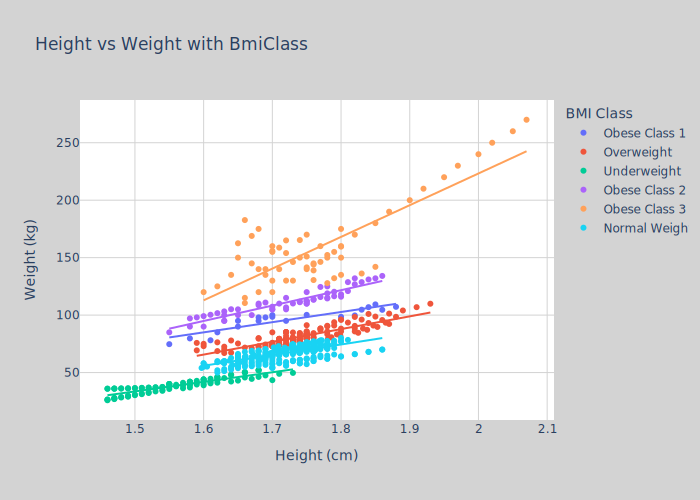

In [9]:
fig = px.scatter(
    df,
    x='Height',
    y='Weight',
    color='BmiClass',
    title='Height vs Weight with BmiClass',
    labels={'Height': 'Height (cm)', 'Weight': 'Weight (kg)'},
    category_orders={'BmiClass': ['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2', 'Obese Class 3']},
    hover_name='BmiClass',
    hover_data={'Height': True, 'Weight': True},
    trendline='ols',  # Add linear regression trendlines
)

fig.update_layout(
    showlegend=True,
    legend_title_text='BMI Class',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    paper_bgcolor='lightgray',
    plot_bgcolor='white',
)

fig.show(renderer="svg")

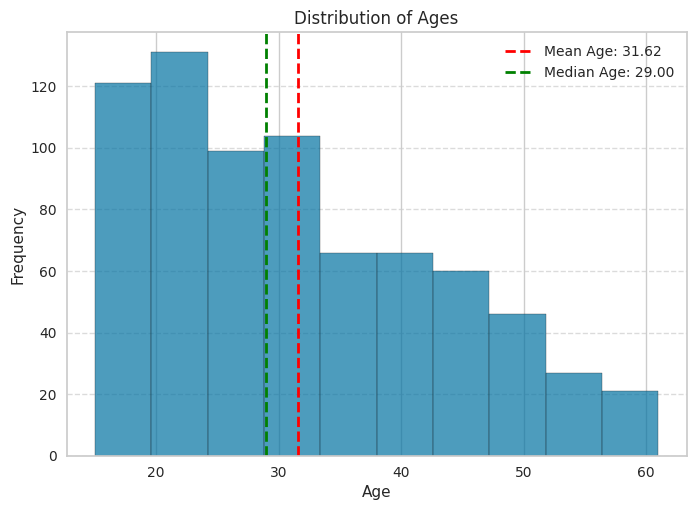

In [8]:
plt.figure()
# Plot the histogram
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Add mean and median lines with labels
mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')
plt.legend()
plt.show()

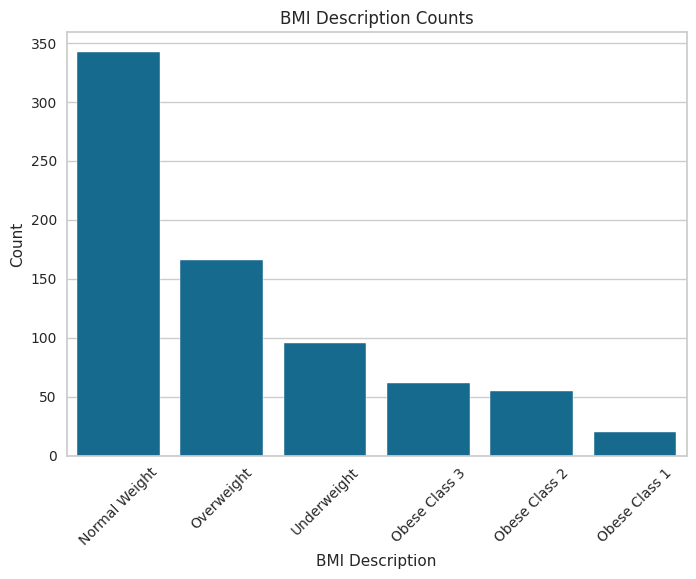

In [12]:
#Bar plot for BMI Description
plt.figure()
sns.countplot(x='BmiClass', data=df, order=df['BmiClass'].value_counts().index)
plt.title('BMI Description Counts')
plt.xlabel('BMI Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

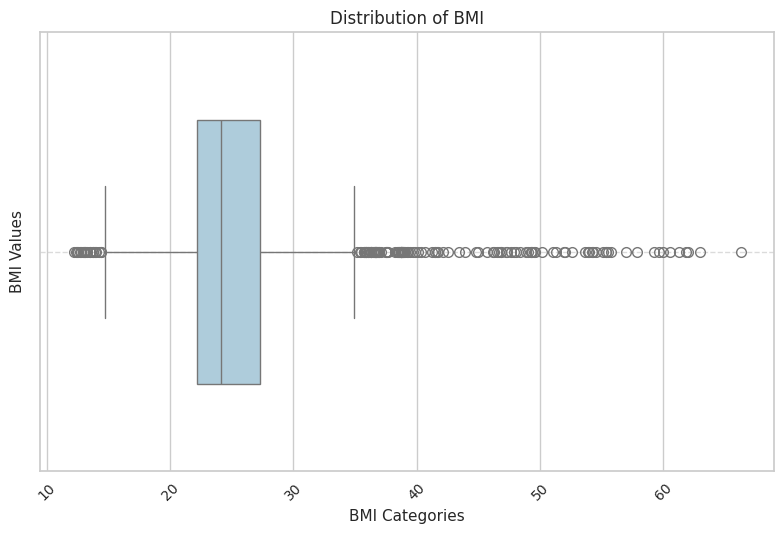

In [13]:
plt.figure()
colors = sns.color_palette('Paired')
# Create the box plot
sns.boxplot(x='Bmi', data=df, palette=colors, width=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of BMI')
plt.xlabel('BMI Categories')
plt.ylabel('BMI Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

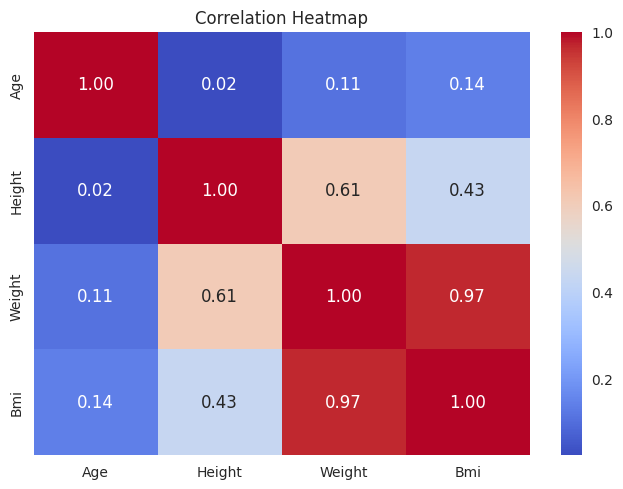

In [14]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
# Create a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

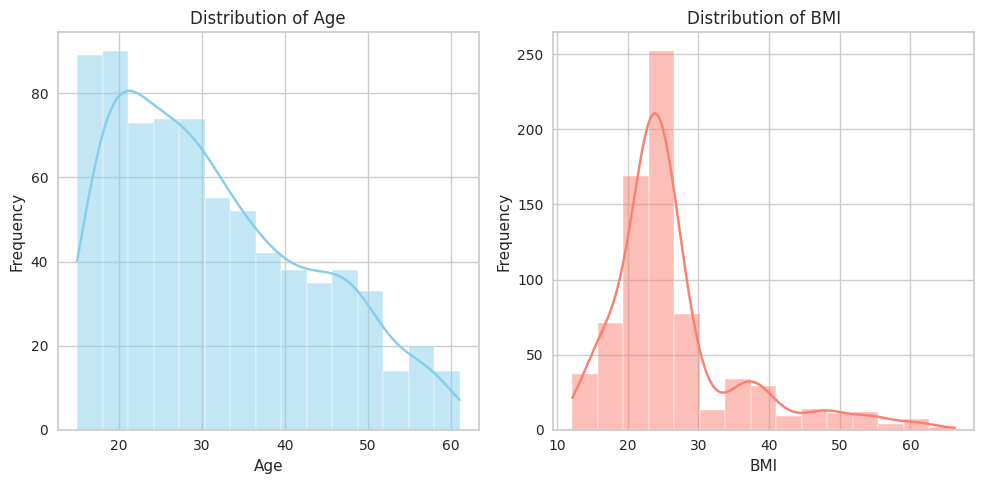

In [15]:
plt.figure(figsize=(10, 5))

# Create a side-by-side histogram for Age and BMI
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=15, color='skyblue', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Bmi'], bins=15, color='salmon', kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
encoding = {
    'Obese Class 1': 3,
    'Overweight': 2,
    'Underweight': 0,
    'Obese Class 2': 4,
    'Obese Class 3': 5,
    'Normal Weight': 1
}

# Assuming you have a DataFrame df with a 'BmiDesc' column, you can create a new encoded column like this:
df['BmiDesc_encoded'] = df['BmiClass'].map(encoding)

In [17]:
df.head()

,Age,Height,Weight,Bmi,BmiClass,BmiDesc_encoded
0,61,1.85,109.30,31.935720,Obese Class 1,3
1,60,1.71,79.02,27.023700,Overweight,2
2,60,1.55,74.70,31.092612,Obese Class 1,3
3,60,1.46,35.90,16.841809,Underweight,0
4,60,1.58,97.10,38.896010,Obese Class 2,4


<h2 style="color: #e94196; font-weight: bold;">CREATE FEATURES AND A TARGET</h2>

In [18]:
#Let's create numpy arrays for features and target
X = df.drop('BmiDesc_encoded',axis=1).drop('BmiClass',axis=1).drop('Bmi',axis=1).values
y = df['BmiDesc_encoded'].values

<h2 style="color: #e94196; font-weight: bold;">SPLIT DATA INTO TRAIN AND TEST SET</h2>

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=666)

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">FIND THE Best value of n</h2>

In [20]:
# Splitting the training data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

n_values = list(range(1, 30))
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_sub, y_train_sub)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy)

best_n = n_values[np.argmax(accuracies)]
colored_text = f'<span style="color: #e94196; font-weight: bold;">Best value of n: {best_n}</span>'
display(HTML(colored_text))

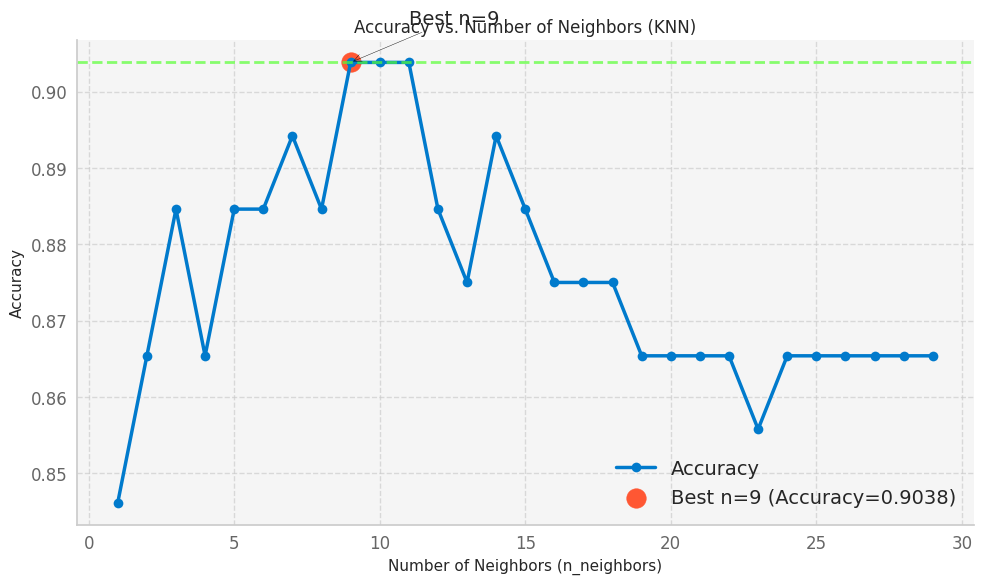

In [21]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracies, marker='o', linestyle='-', color='#007ACC', label='Accuracy', linewidth=2.5)
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.scatter(best_n, max(accuracies), color='#FF5733', marker='o', s=200, label=f'Best n={best_n} (Accuracy={max(accuracies):.4f})')
plt.legend(loc='best', fontsize=14)
plt.axhline(max(accuracies), color='#57FF33', linestyle='--', linewidth=2, label=f'Best Accuracy ({max(accuracies):.4f})', alpha=0.7)
plt.annotate(f'Best n={best_n}', xy=(best_n, max(accuracies)), xytext=(best_n + 2, max(accuracies) + 0.005), fontsize=14,
             arrowprops=dict(arrowstyle='->', color='black'))
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')
plt.tight_layout()
plt.show()

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">Create a K-Nearest Neighbors classifier</h2>


In [22]:
# Create a KNN classifier with the best value of n
knn_best = KNeighborsClassifier(n_neighbors=best_n)

# Train the classifier on the entire training set
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_best.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

colored_text = f'<span style="color: #e94196; font-weight: bold;">Accuracy on test set with n =</span> {best_n} : {test_accuracy}'
display(HTML(colored_text))

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">Evaluate</h2>

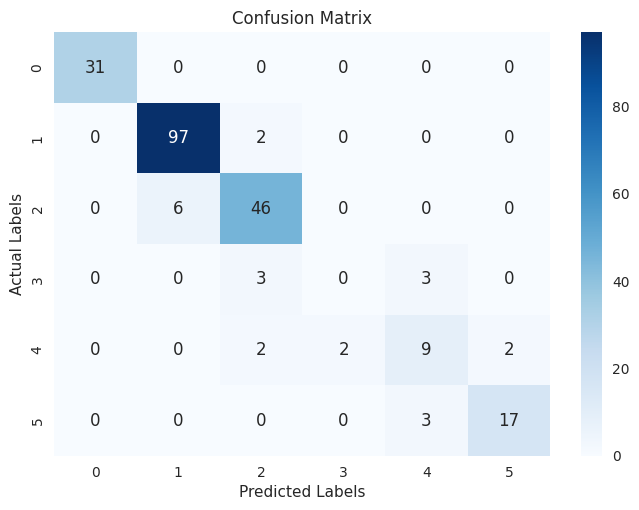

In [23]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [24]:
prGreen(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.94      0.98      0.96        99
           2       0.87      0.88      0.88        52
           3       0.00      0.00      0.00         6
           4       0.60      0.60      0.60        15
           5       0.89      0.85      0.87        20

    accuracy                           0.90       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.88      0.90      0.89       223



**Overall, the model shows good performance for most classes, especially for 'Underweight,' 'Normal Weight,' and 'Obese Class 3.' However, it has a significant issue with 'Obese Class 1,' where it fails to predict any instances correctly.**

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">ROC CURVE</h2>

In [ ]:
ROC = ROCAUC(knn_best)
ROC.fit(X_train, y_train)
ROC.score(X_test, y_test)
ROC.poof()

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">GRID SEARCH FOR KNN Classifier</h2>

In [26]:
param_grid = {'n_neighbors': range(1, 30)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_n = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

colored_text = f'<span style="color: #e94196; font-weight: bold;">Best value of n:</span> {best_n},  <span style="color: #e94196; font-weight: bold;">Best accuracy:</span> {best_accuracy:.4f}'
display(HTML(colored_text))

In [25]:
# Create a KNN classifier with the best value of n
knn_best = KNeighborsClassifier(n_neighbors=best_n)

# Train the classifier on the entire training set
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_best.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
colored_text = f'<span style="color: #e94196; font-weight: bold;">Accuracy on test set with n =</span> {best_n} : {test_accuracy}'
display(HTML(colored_text))

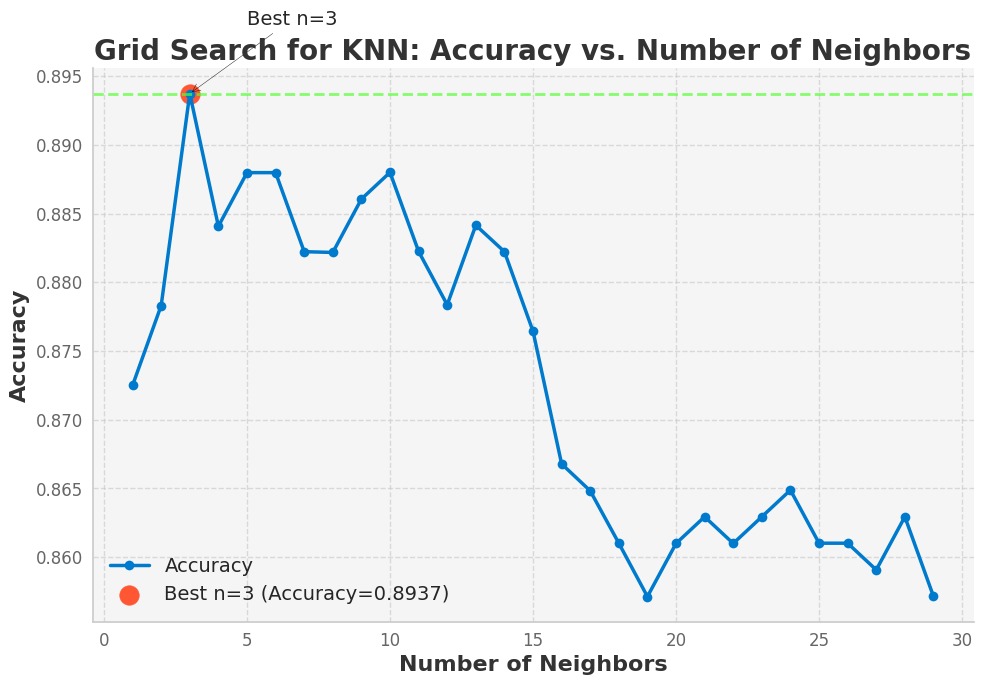

In [27]:
# Plot the accuracy scores for different 'n_neighbors' values
results = grid_search.cv_results_
n_neighbors_values = [param['n_neighbors'] for param in results['params']]
accuracy_scores = results['mean_test_score']

plt.figure(figsize=(10, 7))
plt.plot(n_neighbors_values, accuracy_scores, marker='o', linestyle='-', color='#007ACC', label='Accuracy', linewidth=2.5)
plt.title('Grid Search for KNN: Accuracy vs. Number of Neighbors', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Number of Neighbors', fontsize=16, fontweight='bold', color='#333333')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold', color='#333333')
plt.grid(True, linestyle='--', alpha=0.7)
plt.scatter(best_n, best_accuracy, color='#FF5733', marker='o', s=200, label=f'Best n={best_n} (Accuracy={best_accuracy:.4f})')
plt.legend(loc='best', fontsize=14)
plt.axhline(best_accuracy, color='#57FF33', linestyle='--', linewidth=2, label=f'Best Accuracy ({best_accuracy:.4f})', alpha=0.7)
plt.annotate(f'Best n={best_n}', xy=(best_n, best_accuracy), xytext=(best_n + 2, best_accuracy + 0.005), fontsize=14,
             arrowprops=dict(arrowstyle='->', color='black'))
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')
plt.tight_layout()
plt.show()

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">Evaluate knn with grid search</h2>

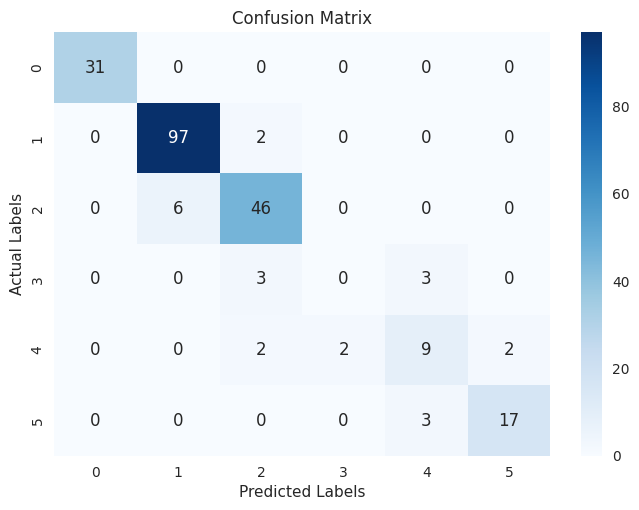

In [28]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [29]:
prGreen(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.94      0.98      0.96        99
           2       0.87      0.88      0.88        52
           3       0.00      0.00      0.00         6
           4       0.60      0.60      0.60        15
           5       0.89      0.85      0.87        20

    accuracy                           0.90       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.88      0.90      0.89       223



<b>Overall, the updated model with grid search results shows some improvements in performance, especially for 'Obese Class 1.'</b>

<h2 style="color: #e94196; font-weight: bold; text-transform: uppercase;">roc curve for knn with grid search</h2>

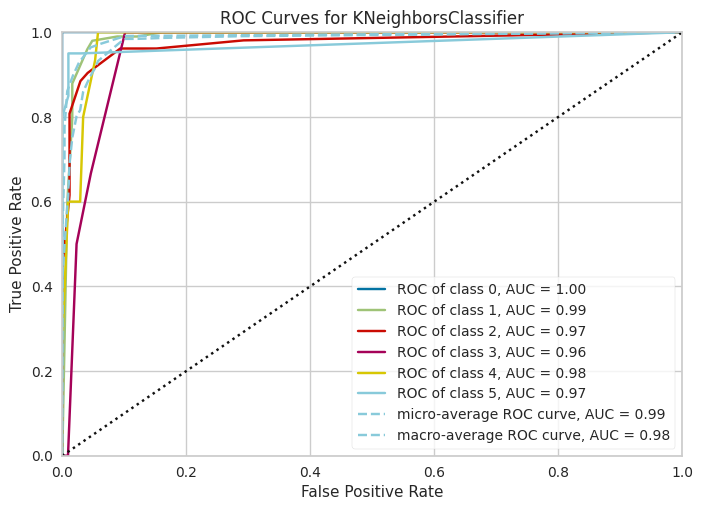

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [30]:
ROC = ROCAUC(knn_best)
ROC.fit(X_train, y_train)
ROC.score(X_test, y_test)
ROC.poof()

<b> In my analysis, I observed that my initial K-Nearest Neighbors (KNN) model performed well with n_neighbors set to 9. However, after implementing grid search, I found that adjusting n_neighbors to 3 yielded improved results. This suggests that hyperparameter tuning can enhance model performance. Nevertheless, I still face challenges in accurately predicting certain classes, such as 'Obese Class 1,' which require further attention and fine-tuning to achieve better results.</b>

 <div style="border:#283618 2px solid ; background-color: #FEFAE0; padding: 20px;">
<font face="Pacifico" color="#606C38" size="5"><b>If you find value in this notebook, I would greatly appreciate it if you could consider giving it a like, following me for more updates, and sharing it with others who might also benefit from it.</b></font>

<font face="Pacifico" color="#DDA15E" size="4"><i>Your support means a lot to me and helps me continue sharing insights and knowledge within the Kaggle community.</i></font>

<font face="Pacifico" color="#BC6C25" size="4"><b>Thank you!</b></font>
</div>